#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the data

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### Checking basic part of the features null value,data description,info,unique,elements

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

#### Finding the correlation from the features

(1.0, 8.0)

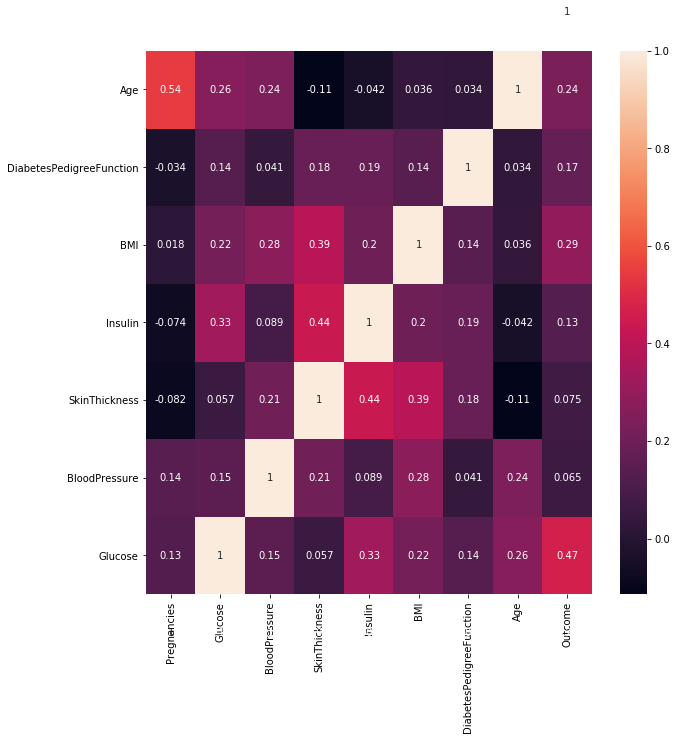

In [9]:
correlationmat=data.corr()
figsize=plt.subplots(figsize=(10,10))
size=sns.heatmap(correlationmat,annot=True,linewidth=0)
top,bot=size.get_ylim()
size.set_ylim(bot+0.5,top-0.5)


#### Spliting dependent and independent features

In [10]:
from sklearn.model_selection import train_test_split
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']
x_train,_xtest,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


#### Creating our Model(Logistic Regression)andDeploying it

In [11]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression().fit(x_train,y_train)

C:\Users\Aravind\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
y_pre=mod.predict(_xtest)

#### Getting the user input for the prediction of the new value

In [13]:
p=int(input("enter the value for pregnancies"))
g=int(input("enter the value for glucose"))
bp=int(input("enter the value for BP"))
s=int(input("enter the value for skin"))
i=int(input("enter the value for insulin"))
b=float(input("enter the value for BMI"))
d=float(input("enter the value for diabetes"))
a=int(input("enter the value for age"))
output=mod.predict([[p,g,bp,s,i,b,d,a]])
if output==1:
    print("high chance of diabetic")
else:
    print("no diabetes")


enter the value for pregnancies6
enter the value for glucose140
enter the value for BP72
enter the value for skin35
enter the value for insulin0
enter the value for BMI33.6
enter the value for diabetes0.627
enter the value for age50
high chance of diabetic


0	6	148	72	35	0	33.6	0.627	50	1
1	1	85	66	29	0	26.6	0.351	31	0
2	8	183	64	0	0	23.3	0.672	32	1
3	1	89	66	23	94	28.1	0.167	21	0
4	0	137	40	35	168	43.1	2.288	33	1

#### Getting the accuracy score ,confusion matrix and classification report

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report



In [15]:
confusion_matrix(y_test,y_pre )

array([[90,  9],
       [25, 30]], dtype=int64)

In [16]:
c=classification_report(y_test,y_pre)
print(c)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



#### Hyperparameter tunning of our model to get best parameters

In [17]:
from sklearn.model_selection import GridSearchCV
#solvers=['newton-cg','lbfg','liblinear']
#penalty=['l2']
#c_values=[1,2,3,4,5]


#grid=dict(solver=solvers,penalty=penalty,C=c_values)
#grid_search=GridSearchCV(estimator=mod,param_grid=grid,n_jobs=-1,cv=5,scoring='accuracy',error_score=0)
#gridresult=grid_search.fit(x,y)

solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
#log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(mod, params, cv=5)
clf.fit(x_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )



C:\Users\Aravind\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Aravind\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Aravind\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Aravind\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Aravind\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", 

  liblinear 0.765
  newton-cg 0.769
  lbfgs 0.767
  sag 0.687
  saga 0.681


In [18]:
clf.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
clf.best_params_


{'solver': 'newton-cg'}

In [20]:
clf.best_index_

1

In [21]:
clf.scorer_

<function sklearn.metrics.scorer._passthrough_scorer(estimator, *args, **kwargs)>

#### Imputing best parameters in our new model

In [22]:
from sklearn.linear_model import LogisticRegression
mod1=LogisticRegression(solver='newton-cg',penalty='l2',C=1).fit(x_train,y_train)
ypred1=mod1.predict(_xtest)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

#### Checking the performance of our new model 

In [24]:
c1=classification_report(y_test,ypred1)
print(c1)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

